[[1 0]
 [0 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



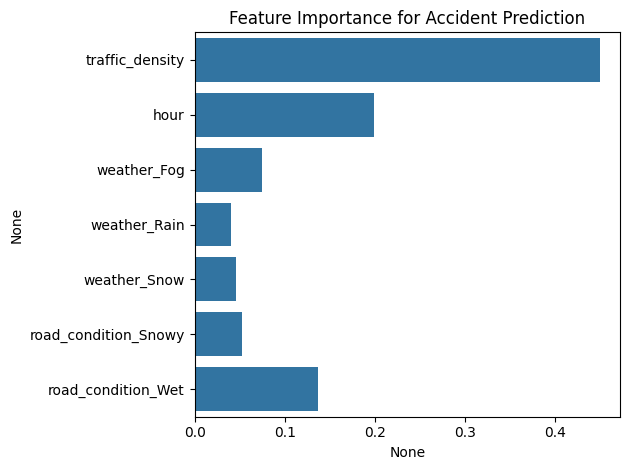

In [2]:


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Simulated dataset (replace with real traffic data)
data = {
    'weather': ['Clear', 'Rain', 'Snow', 'Fog', 'Clear', 'Rain'],
    'road_condition': ['Dry', 'Wet', 'Snowy', 'Wet', 'Dry', 'Wet'],
    'traffic_density': [2, 4, 5, 3, 2, 4],
    'hour': [8, 18, 22, 5, 14, 19],
    'accident': [0, 1, 1, 1, 0, 1]
}

df = pd.DataFrame(data)

# Preprocessing
df = pd.get_dummies(df, columns=['weather', 'road_condition'], drop_first=True)

# Features and target
X = df.drop('accident', axis=1)
y = df['accident']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prediction and Evaluation
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importance for Accident Prediction')
plt.tight_layout()
plt.show()